#### 利用用户标签数据
标签是一种无层次化结构的、用来描述信息的关键词，它可以用来描述物品的语义。标签一方面可以体现用户的兴趣，另一方面表示了物品的语义。通过标签可以将物品与用户联系起来。

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

In [22]:
def load_data(paths):
    def read_tags():
        """(tag_id,value)"""
        tag_cols = ['tag_id','val']
        return pd.read_csv(paths['tags'],sep='\t',names=tag_cols,engine='python')
    def read_bkmarks():
        """id	md5	title	url	md5Principal	urlPrincipal"""
        mk_cols = ['mk_id','md5','title','url','md5Principal','urlPrincipal']
        return pd.read_csv(paths['bkmarks'],sep='\t',names=mk_cols,engine='python')
    def read_user_tag_bkmks():
        """userID	bookmarkID	tagID	day	month	year	hour	minute	second"""
        utb_cols = ['user_id','mk_id','tag_id','day','month','year','hour','minute','second']
        return pd.read_csv(paths['utbs'],sep='\t',names=utb_cols,engine='python')
    return read_tags(),read_bkmarks(),read_user_tag_bkmks()

In [23]:
paths = {
    'tags': '../dataset/delicious-2k/tags.dat',
    'bkmarks': '../dataset/delicious-2k/bookmarks.dat',
    'utbs': '../dataset/delicious-2k/user_taggedbookmarks.dat',
}
tags,bkmarks,utbks = load_data(paths)

In [24]:
tags = tags.drop(0)
bkmarks = bkmarks.drop(0)
utbks = utbks.drop(0)

标签的流行度分布呈现非常典型的长尾分布。

In [26]:
tags.head()

,tag_id,val
1,1,collection_development
2,2,library
3,3,collection
4,4,development
5,5,lesson_plan


In [39]:
tag_static_pr = utbks['tag_id'].value_counts()
tag_static_x = tag_static_pr.unique()
tag_static_y = []
tag_static_pr = tag_static_pr.tolist()
for x in tag_static_x:
    tag_static_y.append(tag_static_pr.count(x))

(1, 1000)

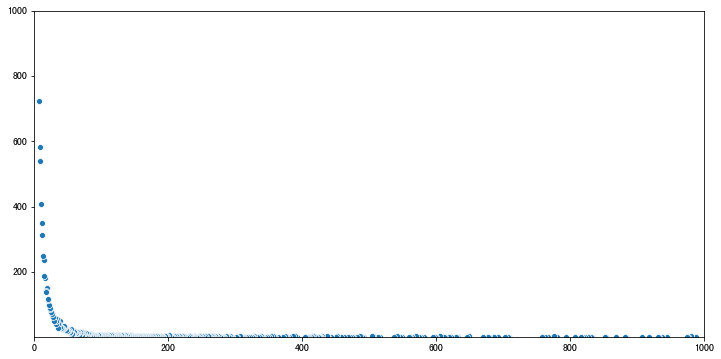

In [61]:
tag_static = []
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x=tag_static_x,y=tag_static_y)
plt.xlim(0,1000)
plt.ylim(1,1000)

In [87]:
tags_more_popular = utbks['tag_id'].value_counts()[:20]
[tags.loc[tags.tag_id == key, 'val']. for key,v in tags_more_popular.items()]

[121    design
 Name: val, dtype: object, 198    tools
 Name: val, dtype: object, 142    video
 Name: val, dtype: object, 36    education
 Name: val, dtype: object, 155    art
 Name: val, dtype: object, 433    webdesign
 Name: val, dtype: object, 220    web
 Name: val, dtype: object, 173    web20
 Name: val, dtype: object, 96    twitter
 Name: val, dtype: object, 342    blog
 Name: val, dtype: object, 205    reference
 Name: val, dtype: object, 158    google
 Name: val, dtype: object, 68    technology
 Name: val, dtype: object, 118    inspiration
 Name: val, dtype: object, 4    development
 Name: val, dtype: object, 874    javascript
 Name: val, dtype: object, 531    programming
 Name: val, dtype: object, 52    writing
 Name: val, dtype: object, 399    software
 Name: val, dtype: object, 145    music
 Name: val, dtype: object]

最简单的推荐方式：  
统计用户最常用标签，对每个标签，统计该标签下，最常见的物品，进行推荐。
$$
p(u,i) = \sum_b{n_{u,b}n_{b,i}}
$$
Nub表示用户u对标签b的次数，Nbi是物品i被打上标签b的次数